In [222]:
import csv
import locale
import time
from datetime import datetime

locale.setlocale(locale.LC_ALL, '')
timeFactor = lambda x: round(1 + 0.03714286*float(x) - 0.04285714*pow(x, 2), 2)

def yearsFromDate(dateString):
    date = datetime.strptime(dateString, "%m/%d/%Y")
    diff = datetime.utcnow() - date 
    return round(diff.days / 365, 2)

def getNumEmployees(employeesString):
    if '+' in employeesString:
        return employeesString[:employeesString.index('+')]
    return employeesString[employeesString.index('-') + 1:] if '-' in employeesString else "10000"

with open ('new_top_companies.csv', 'r') as file:
    reader = csv.DictReader(file)
    companies = [row for row in reader]
for company in companies:
    status = company['Last Funding Type'] if company['Status'] != 'IPO' else company['Status']
    time_weight = timeFactor(yearsFromDate(company['Last Funding Date'])) if status != 'IPO' else 1
    total_funding = round(locale.atof(company['Total Equity Funding Amount'][1:])/1000000, 2)
    num_employees = int(getNumEmployees(company['Number of Employees']))
    score = round(total_funding * time_weight / num_employees, 3)
    company['Score'] = str(score)
    
for company in companies[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

SpaceX | $1,495,560,000 | 1001-5000 | 0.302
BuzzFeed | $496,300,000 | 501-1000 | 0.496
Uber | $8,812,450,000 | 5001-10000 | 0.89
HubSpot | $100,500,000 | 501-1000 | 0.101
DJI | $105,000,000 |  | 0.009
Symantec | $503,000,000 | 10001+ | 0.05
Redfin | $167,820,000 | 501-1000 | 0.168
GrubHub | $84,100,000 | 501-1000 | 0.084
Flipkart | $7,122,140,000 | 10001+ | 0.712
Yelp | $56,000,000 | 501-1000 | 0.056
WeWork | $9,853,784,331 | 501-1000 | 9.854
Databricks | $247,000,000 | 101-250 | 0.988
ThoughtSpot | $150,700,000 | 101-250 | 0.603
Hyperloop One | $141,100,000 | 101-250 | 0.564
Groupon | $1,387,000,000 | 1001-5000 | 0.277
Impossible Foods | $257,000,000 | 101-250 | 1.028
Lyft | $2,612,500,000 | 1001-5000 | 0.528
Outbrain | $194,000,000 | 501-1000 | 0.188
TuneIn | $103,122,231 | 51-100 | 1.031
Zillow | $96,627,980 | 1001-5000 | 0.019


In [223]:
companies.sort(key=lambda x: float(x['Score']), reverse=True)
for company in companies[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Ele.me | $3,335,000,000 | 11-50 | 67.367
Filecoin | $252,120,000 | 1-10 | 25.212
Jiuxian.com | $249,963,505 | 1-10 | 21.996
Wish | $1,078,700,000 | 11-50 | 21.574
Expa | $150,000,000 | 1-10 | 14.4
Ionic Security | $122,440,001 | 1-10 | 11.877
WeWork | $9,853,784,331 | 501-1000 | 9.854
ARMO BioSciences | $100,000,000 | 1-10 | 9.5
Genalyte | $91,800,000 | 1-10 | 9.18
Calient Technologies | $405,118,814 | 11-50 | 8.021
Forty Seven | $75,000,000 | 1-10 | 7.125
Dailyhunt | $66,643,163 | 1-10 | 6.664
PPDai | $70,200,000 | 1-10 | 5.827
Guardant Health | $550,000,000 | 51-100 | 5.555
Mobvoi Inc. | $252,720,178 | 11-50 | 5.105
Kabbage | $488,650,000 | 51-100 | 4.886
AirMap | $43,600,000 | 1-10 | 4.404
Desktop Metal | $211,760,835 | 11-50 | 4.278
Editas Medicine | $210,000,000 | 11-50 | 4.2
Katerra | $205,573,028 | 11-50 | 4.153


In [224]:
sf_startups = [company for company in companies if 'San Francisco, California, United States' in company['Headquarters Location']]
for company in sf_startups[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Wish | $1,078,700,000 | 11-50 | 21.574
Expa | $150,000,000 | 1-10 | 14.4
Digit | $36,300,000 | 1-10 | 3.521
Pinterest | $1,466,100,000 | 251-500 | 2.962
Instacart | $674,800,000 | 101-250 | 2.726
Instabase | $26,970,000 | 1-10 | 2.724
Autonomic Technologies | $136,200,000 | 11-50 | 2.533
Vicarious | $122,000,000 | 11-50 | 2.464
Mavrx | $22,420,781 | 1-10 | 2.22
Airware | $109,550,000 | 11-50 | 2.213
Invuity | $106,999,999 | 11-50 | 2.14
Amitree | $19,828,000 | 1-10 | 1.983
SoFi | $1,878,226,991 | 501-1000 | 1.897
Affirm | $420,000,000 | 101-250 | 1.68
Discord | $79,300,000 | 11-50 | 1.602
Chatous | $18,100,000 | 1-10 | 1.593
Freenome | $77,550,000 | 11-50 | 1.551
Five Prime Therapeutics | $155,040,487 | 51-100 | 1.55
Anki | $157,500,000 | 51-100 | 1.543
FLX Bio | $79,000,000 | 11-50 | 1.533


In [225]:
fintech_startups = [company for company in companies if 'FinTech' in company['Categories']]
for company in fintech_startups[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

PPDai | $70,200,000 | 1-10 | 5.827
Kabbage | $488,650,000 | 51-100 | 4.886
Cadre | $133,300,000 | 11-50 | 2.693
Blockstream | $126,000,000 | 11-50 | 2.369
BlueVine | $113,000,000 | 11-50 | 2.283
Samlino.dk | $20,463,040 | 1-10 | 2.026
Wealthfront | $129,500,000 | 11-50 | 1.917
SoFi | $1,878,226,991 | 501-1000 | 1.897
Robinhood | $176,000,000 | 51-100 | 1.778
Affirm | $420,000,000 | 101-250 | 1.68
Behalf | $156,000,000 | 51-100 | 1.544
Blockchain | $70,000,000 | 11-50 | 1.414
Hyper Anna | $13,644,766 | 1-10 | 1.364
Circle | $136,000,000 | 51-100 | 1.333
Trumid Financial | $54,250,000 | 11-50 | 1.096
VoloAgri Group | $116,592,000 | 51-100 | 1.049
Quantopian | $48,800,000 | 11-50 | 0.976
Fundbox | $107,500,000 | 51-100 | 0.968
PLASTIQ | $45,349,996 | 11-50 | 0.907
Veem | $44,250,000 | 11-50 | 0.894


In [226]:
non_biotech_companies = [company for company in companies if 'Biotechnology' not in company['Categories']]
for company in non_biotech_companies[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Ele.me | $3,335,000,000 | 11-50 | 67.367
Filecoin | $252,120,000 | 1-10 | 25.212
Jiuxian.com | $249,963,505 | 1-10 | 21.996
Wish | $1,078,700,000 | 11-50 | 21.574
Expa | $150,000,000 | 1-10 | 14.4
Ionic Security | $122,440,001 | 1-10 | 11.877
WeWork | $9,853,784,331 | 501-1000 | 9.854
Calient Technologies | $405,118,814 | 11-50 | 8.021
Dailyhunt | $66,643,163 | 1-10 | 6.664
PPDai | $70,200,000 | 1-10 | 5.827
Mobvoi Inc. | $252,720,178 | 11-50 | 5.105
Kabbage | $488,650,000 | 51-100 | 4.886
AirMap | $43,600,000 | 1-10 | 4.404
Desktop Metal | $211,760,835 | 11-50 | 4.278
Katerra | $205,573,028 | 11-50 | 4.153
Go-Jek | $1,750,000,000 | 251-500 | 3.535
Digit | $36,300,000 | 1-10 | 3.521
Nauto, Inc. | $173,850,000 | 11-50 | 3.512
cheddar | $32,000,000 | 1-10 | 3.232
Pinterest | $1,466,100,000 | 251-500 | 2.962


In [227]:
mobile_startups = [company for company in companies if 'Mobile' in company['Category Groups'] and 'United States' in company['Headquarters Location']]
for company in mobile_startups[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Wish | $1,078,700,000 | 11-50 | 21.574
Expa | $150,000,000 | 1-10 | 14.4
Nauto, Inc. | $173,850,000 | 11-50 | 3.512
Skydio | $28,000,000 | 1-10 | 2.632
Joya Communications | $25,000,000 | 1-10 | 2.5
ooma | $95,432,819 | 11-50 | 1.909
Robinhood | $176,000,000 | 51-100 | 1.778
Onshape | $169,000,000 | 51-100 | 1.622
AOptix Technologies | $188,722,849 | 51-100 | 1.604
Discord | $79,300,000 | 11-50 | 1.602
Houseparty | $73,200,000 | 11-50 | 1.464
PayRange | $14,750,000 | 1-10 | 1.268
Zeel | $13,200,000 | 1-10 | 1.267
Mast Mobile | $12,400,000 | 1-10 | 1.153
Branch | $113,050,000 | 51-100 | 1.142
Diffbot | $12,000,000 | 1-10 | 1.14
AISense Inc. | $11,200,000 | 1-10 | 1.131
Jawbone | $590,799,995 | 251-500 | 1.111
TuneIn | $103,122,231 | 51-100 | 1.031
Getaround | $101,299,999 | 51-100 | 1.023


In [228]:
data_startups = [company for company in companies if 'Data and Analytics' in company['Category Groups']]
for company in data_startups[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Wish | $1,078,700,000 | 11-50 | 21.574
Mobvoi Inc. | $252,720,178 | 11-50 | 5.105
AirMap | $43,600,000 | 1-10 | 4.404
Instabase | $26,970,000 | 1-10 | 2.724
Vicarious | $122,000,000 | 11-50 | 2.464
Mavrx | $22,420,781 | 1-10 | 2.22
CYNGN | $115,000,000 | 11-50 | 1.886
Farmers Business Network | $83,900,000 | 11-50 | 1.695
AOptix Technologies | $188,722,849 | 51-100 | 1.604
Orbital Insight, Inc. | $78,700,000 | 11-50 | 1.59
Anki | $157,500,000 | 51-100 | 1.543
Color Genomics | $150,548,112 | 51-100 | 1.506
Hyper Anna | $13,644,766 | 1-10 | 1.364
Lemonade | $60,000,000 | 11-50 | 1.212
Branch | $113,050,000 | 51-100 | 1.142
Versive | $57,000,000 | 11-50 | 1.14
Diffbot | $12,000,000 | 1-10 | 1.14
Elastifile | $58,000,000 | 11-50 | 1.137
Cockroach Labs | $53,500,000 | 11-50 | 1.081
Genius | $56,900,000 | 11-50 | 1.047


In [229]:
nyc_startups = [company for company in companies if 'New York' in company['Headquarters Location']]
for company in nyc_startups[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

WeWork | $9,853,784,331 | 501-1000 | 9.854
cheddar | $32,000,000 | 1-10 | 3.232
Cadre | $133,300,000 | 11-50 | 2.693
Casper | $239,700,000 | 51-100 | 2.421
Common | $23,350,000 | 1-10 | 2.288
Spring Inc | $97,500,000 | 11-50 | 1.969
Peloton | $444,707,000 | 101-250 | 1.797
Blink Health | $165,000,000 | 51-100 | 1.667
Behalf | $156,000,000 | 51-100 | 1.544
letgo | $375,000,000 | 101-250 | 1.515
Giphy | $150,949,998 | 51-100 | 1.509
Oscar | $727,500,000 | 251-500 | 1.382
Beeswax | $13,300,000 | 1-10 | 1.317
Zeel | $13,200,000 | 1-10 | 1.267
Lemonade | $60,000,000 | 11-50 | 1.212
MakeSpace | $57,600,000 | 11-50 | 1.164
Mast Mobile | $12,400,000 | 1-10 | 1.153
Trumid Financial | $54,250,000 | 11-50 | 1.096
Cockroach Labs | $53,500,000 | 11-50 | 1.081
Modern Meadow | $53,500,000 | 11-50 | 1.049


In [230]:
import pandas as pd

data = pd.read_csv('company_talent.csv', index_col = False)
data.columns = ['company_name', 'num_employees', 'past_companies', 'past_schools']

In [231]:
data.dropna(how='any')
data.drop_duplicates(['company_name'])

,company_name,num_employees,past_companies,past_schools
0,Affirm Inc,281,"Google, Affirm, Inc., LinkedIn, Stanford Unive...","Stanford University, University of California,..."
1,Flexport,446,"Flexport, Kuehne + Nagel, Damco, EY, Deloitte","University of California, Berkeley, Stanford U..."
2,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California,..."
4,Lemonade Inc,50,"Liberty Mutual Insurance, AIG, Fiverr, Powerma...","Tel Aviv University, IDC Herzliya, Technion - ..."
5,Ripple,208,"Ripple, HSBC, Morgan Stanley, Citi, Accenture","University of California, Berkeley, Stanford U..."
6,Cadre,88,"Morgan Stanley, Goldman Sachs, Google, Square,...","University of Pennsylvania, Harvard University..."
7,Zocdoc,588,"Zocdoc, Apple, Microsoft, Yodle, Arizona State...","Arizona State University, Cornell University, ..."
8,Sourcegraph,21,"Google, Stanford University, LinkedIn, Bain & ...","Stanford University, Emerson College, Vanderbi..."
9,SpaceX,4602,"SpaceX, Boeing, US Navy, United States Air For...","University of Southern California, Embry-Riddl..."


In [232]:
data.drop_duplicates(subset=['company_name']).head(10)

,company_name,num_employees,past_companies,past_schools
0,Affirm Inc,281,"Google, Affirm, Inc., LinkedIn, Stanford Unive...","Stanford University, University of California,..."
1,Flexport,446,"Flexport, Kuehne + Nagel, Damco, EY, Deloitte","University of California, Berkeley, Stanford U..."
2,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California,..."
4,Lemonade Inc,50,"Liberty Mutual Insurance, AIG, Fiverr, Powerma...","Tel Aviv University, IDC Herzliya, Technion - ..."
5,Ripple,208,"Ripple, HSBC, Morgan Stanley, Citi, Accenture","University of California, Berkeley, Stanford U..."
6,Cadre,88,"Morgan Stanley, Goldman Sachs, Google, Square,...","University of Pennsylvania, Harvard University..."
7,Zocdoc,588,"Zocdoc, Apple, Microsoft, Yodle, Arizona State...","Arizona State University, Cornell University, ..."
8,Sourcegraph,21,"Google, Stanford University, LinkedIn, Bain & ...","Stanford University, Emerson College, Vanderbi..."
9,SpaceX,4602,"SpaceX, Boeing, US Navy, United States Air For...","University of Southern California, Embry-Riddl..."


In [233]:
past_schools_column = []
school_prefixes = ['University of California', 'California State University', 'Indian Institute of Technology']
for index, school_string in enumerate(data.past_schools):
    if not isinstance(school_string, str):
        data.drop(index, inplace=True)
        continue
    schools = school_string.split(',') 
    for k, v in enumerate(schools):
        if any(school_prefix == v.strip() for school_prefix in school_prefixes):
            if k + 1 < len(schools):
                schools[k] += schools[k+1]
                schools[k].strip()
                del(schools[k+1])
        if v.strip() == 'Haas School of Business':
            schools[k - 1] += schools[k]
            del(schools[k])
    past_schools_column.append(','.join(schools))
data.past_schools = past_schools_column

In [234]:
stanford_startups = data[data.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0])]
stanford_startups.tail(5)

,company_name,num_employees,past_companies,past_schools
1666,Shogun Enterprises,15,"Northwestern University, Stanford University, ...","Stanford University, Northwestern University, ..."
1668,Stripe,831,"Google, Twitter, Stripe, Facebook, Microsoft","Stanford University, University of California ..."
1670,21.co,26,"Counsyl, OpenGov Inc., 21.co, Merrill Lynch, H...","Stanford University, Massachusetts Institute o..."
1682,Digit.co,34,"Blurb, Square, PENSCO Trust Company, a subsidi...","Stanford University, University of California ..."
1691,DivvyHomes,5,"DoubleDutch, SpaceX, Square, Microsoft, Merril...","Stanford University, Cornell University, Calif..."


In [235]:
stanford_startups = stanford_startups[(stanford_startups.num_employees > 10) & (stanford_startups.num_employees < 300)]
stanford_startups.sort_values('num_employees').tail(10)

,company_name,num_employees,past_companies,past_schools
810,Newsela,206,"Newsela, Teach For America, Stanford Universit...","Stanford University, New York University, Hunt..."
224,Instart Logic,210,"Akamai Technologies, Hewlett Packard Enterpris...","Stanford University, University of California ..."
168,Change.org,217,"Change.org, Zynga, Greenpeace, Cisco, Plan Int...","Stanford University, University of California ..."
428,Honor,218,"Google, Meebo, Apple, Home Instead Senior Care...","Stanford University, Stanford University Gradu..."
21,ThoughtSpot,220,"IBM, ThoughtSpot, Oracle, Google, Stanford Uni...","Stanford University, San Jose State University..."
456,Doctor On Demand,233,"vRad (Virtual Radiologic), Castlight Health, P...","Stanford University, New York University, Univ..."
644,Hearsay Systems,253,"Hearsay Systems, Microsoft, Google, Salesforce...","Stanford University, University of California ..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ..."
140,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ..."
0,Affirm Inc,281,"Google, Affirm, Inc., LinkedIn, Stanford Unive...","Stanford University, University of California ..."


In [236]:
stanford_startups.sort_values('num_employees').head(15)

,company_name,num_employees,past_companies,past_schools
1246,Boom Fantasy,14,"IAF - Israeli Air Force, Carestream, High 5 Ga...",Stanford University Graduate School of Busines...
792,Joya Communications,14,"Microsoft, Clarion University of Pennsylvania,...",Stanford University Graduate School of Busines...
873,Ascend.io,14,"Microsoft, IBM, Ooyala, Oracle, Extole","Stanford University, University of California ..."
999,Gixo,14,"SurveyMonkey, TRX Training, Wilkes Barre Power...","Stanford University, Brigham Young University,..."
1666,Shogun Enterprises,15,"Northwestern University, Stanford University, ...","Stanford University, Northwestern University, ..."
1212,Sherpaa,15,"GE Healthcare, Personal, Hello Health Inc., Lo...","Stanford University, The Johns Hopkins Univers..."
1209,Invicta Medical,16,"BlackBerry, Medconx, Inc., Singularity Univers...","Stanford University, University of Southern Ca..."
816,AISense Inc.,16,"Yahoo! Inc., Knowles Intelligent Audio, Google...","Stanford University, Nankai University, Peking..."
777,Buoyant,17,"Twitter, Gracenote, SoundCloud, Oracle, Cisco","Stanford University, University of California ..."
433,LiftIgniter,17,"Act-On Software, Inc., Seagate Technology, Web...","Stanford University, Princeton University, The..."


In [237]:
former_palantir = data[data.past_companies.str.contains('Palantir Technologies', na=False)]
former_palantir

,company_name,num_employees,past_companies,past_schools
2,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ..."
410,MemSQL,120,"Oracle, Microsoft, MemSQL, Palantir Technologi...","Stanford University, Carnegie Mellon Universit..."
674,Handshake,82,"Michigan Technological University, Google, Pal...","Michigan Technological University, Stanford Un..."
929,Alluxio,23,"Microsoft, Google, Palantir Technologies, Broc...","Carnegie Mellon University, Tsinghua Universit..."
1269,Asana,338,"Asana, Google, Facebook, Apple, Palantir Techn...","Stanford University, Cornell University, Unive..."
1459,Palantir Technologies,1992,"Palantir Technologies, Google, Microsoft, Stan...","Stanford University, Cornell University, Massa..."
1658,Socotra,45,"Palantir Technologies, Carnegie Mellon Univers...","University of California Berkeley, Stanford Un..."


In [238]:
ex_bridgewater = data[data.past_companies.str.contains('Bridgewater', na=False)]
ex_bridgewater

,company_name,num_employees,past_companies,past_schools
140,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ..."
371,Domino Data Lab,72,"Bridgewater Associates, FactSet, Platfora (Acq...","Massachusetts Institute of Technology, Univers..."
882,Hello Alfred,47,"SoulCycle Inc., Bridgewater Associates, McKins...","New York University, Boston University, Harvar..."
917,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ..."
980,HealthSherpa,20,"Carter's | OshKosh B'gosh, HealthSTAR Communic...","California State University-Sacramento, Yale U..."
1012,OpenInvest,14,"Bridgewater Associates, World Wildlife Fund, L...","The Johns Hopkins University, Cornell Universi..."
1495,Hubble Contacts,15,"Starbucks, Panaya, Hubble Contacts, Bridgewate...","Hunter College, Columbia University in the Cit..."
1522,MediaSpike,9,"Wolfram, HMC Electronics, A Division of Hisco,...","Lodz University of Technology, University of I..."
1659,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka..."


In [239]:
ex_google = data[data.past_companies.str.contains('Google', na=False)]
ex_google.sort_values('num_employees').tail(10)

,company_name,num_employees,past_companies,past_schools
383,Square,2258,"Square, Apple, Google, Microsoft, Visa","University of California Berkeley, Stanford Un..."
43,Atlassian,2348,"Atlassian, IBM, Microsoft, Google, Macquarie G...","UNSW, University of Sydney, University of Tech..."
240,Etsy,2709,"Etsy, Google, PwC, Yahoo! Inc., Apple","New York University, Fashion Institute of Tech..."
602,Spotify,3587,"Spotify, Ericsson, Microsoft, Google, Yahoo! Inc.","KTH Royal Institute of Technology, Stockholm U..."
29,Twitter,3742,"Twitter, Google, Microsoft, Yahoo! Inc., Apple","University of California Berkeley, Stanford Un..."
68,Airbnb,6213,"Airbnb, Google, Facebook, Microsoft, Apple","University of California Berkeley, Stanford Un..."
25,Lyft,8321,"Lyft, Google, US Army, US Navy, Walmart","University of Phoenix, University of Californi..."
44,Facebook,22258,"Facebook, Microsoft, Google, Yahoo! Inc., Amazon","Stanford University, University of California ..."
11,Uber,33076,"Uber, Microsoft, Google, Apple, Amazon","University of California Berkeley, Stanford Un..."
115,Google,80409,"Google, Microsoft, IBM, Amazon, Apple","Stanford University, University of California ..."


In [240]:
prime_startups = data[data.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0] and 'Berkeley' in x.split(',')[1])]
prime_startups.sort_values('num_employees')

,company_name,num_employees,past_companies,past_schools
777,Buoyant,17,"Twitter, Gracenote, SoundCloud, Oracle, Cisco","Stanford University, University of California ..."
909,Halo Neuroscience,26,"McKinsey & Company, Hamilton College, The Bost...","Stanford University, University of California ..."
761,Momentum Machines,28,"Stanford University, Tesla, Momentum Machines ...","Stanford University, University of California ..."
954,Brightwheel,32,"Amazon, LinkedIn, Indiegogo, NerdWallet, Soldsie","Stanford University, University of California ..."
1682,Digit.co,34,"Blurb, Square, PENSCO Trust Company, a subsidi...","Stanford University, University of California ..."
1485,Karius,48,"Stanford University, University of California,...","Stanford University, University of California ..."
1351,Vigilent,49,"Vigilent, Marine Corps Recruiting, Lockheed Ma...","Stanford University, University of California ..."
538,Navdy,54,"Cisco, Astro Studios, Navdy, 99designs, Apple","Stanford University, University of California ..."
917,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ..."
46,Color Genomics,123,"Twitter, Google, University of California, Dav...","Stanford University, University of California ..."


In [241]:
past_schools = []
for school in [company for company in data.past_schools]:
    past_schools.extend([s.strip() for s in school.split(',')])

In [242]:
len(set(past_schools))

1808

In [243]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

schools_counter = Counter(past_schools)
common_schools = [school for school, count in schools_counter.most_common(25)]
common_schools_count = [count for school, count in schools_counter.most_common(25)]

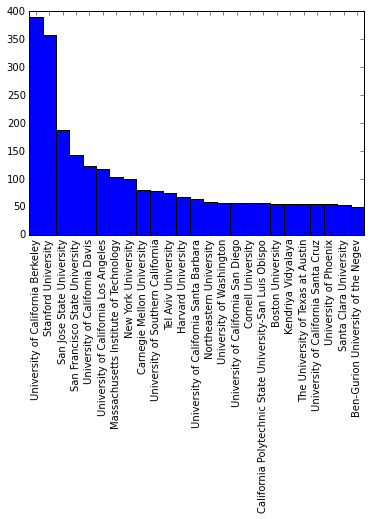

In [244]:
indexes = np.arange(len(common_schools))
width = 1

plt.bar(indexes, common_schools_count, width)
plt.xticks(indexes + width * 0.5, common_schools)
plt.xticks(rotation=90)
plt.show()

In [248]:
past_companies_column = []
company_postfixes = ['Inc.']
for index, company_string in data.past_companies.items():
    if not isinstance(company_string, str):
        data.drop(index, inplace=True)
        continue
    companies = company_string.split(',')
    for k, v in enumerate(companies):
        if any(company_postfix == v.strip() for company_postfix in company_postfixes):
            companies[k - 1] += companies[k]
            del(companies[k])
    past_companies_column.append(','.join(companies))
data.past_companies = past_companies_column

In [254]:
past_companies = []
for company in [company for company in data.past_companies]:
    past_companies.extend([s.strip() for s in company.split(',')])

In [262]:
company_counter = Counter(past_companies)
common_companies = [company for company, count in company_counter.most_common(25)]
common_companies_count = [count for company, count in company_counter.most_common(25)]
company_counter.most_common(40)

[('Microsoft', 227),
 ('IBM', 181),
 ('Google', 171),
 ('Oracle', 130),
 ('Hewlett Packard Enterprise', 114),
 ('Cisco', 113),
 ('Apple', 90),
 ('Yahoo! Inc.', 80),
 ('University of California', 63),
 ('Stanford University', 61),
 ('Amazon', 50),
 ('Intel Corporation', 48),
 ('Israel Defense Forces', 44),
 ('Nokia', 41),
 ('Symantec', 40),
 ('Salesforce', 37),
 ('Facebook', 36),
 ('eBay', 35),
 ('VMware', 33),
 ('LinkedIn', 30),
 ('Sun Microsystems', 29),
 ('Dell', 28),
 ('Accenture', 27),
 ('Dell EMC', 26),
 ('Citi', 25),
 ('Electronic Arts (EA)', 24),
 ('Goldman Sachs', 23),
 ('American Express', 22),
 ('Berkeley', 22),
 ('Target', 22),
 ('Adobe', 21),
 ('Massachusetts Institute of Technology', 21),
 ('AT&T', 20),
 ('Groupon', 20),
 ('Flipkart', 19),
 ('Inc', 19),
 ('US Army', 19),
 ('NetApp', 19),
 ('Twitter', 18),
 ('Morgan Stanley', 18)]

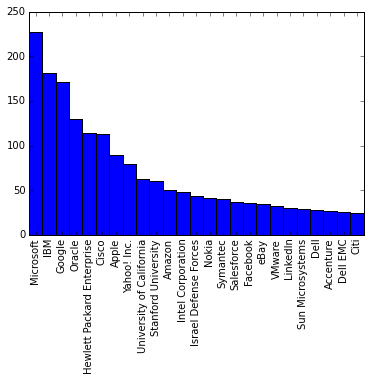

In [260]:
indexes = np.arange(len(common_companies))
width = 1

plt.bar(indexes, common_companies_count, width)
plt.xticks(indexes + width * 0.5, common_companies)
plt.xticks(rotation=90)
plt.show()